## **Task 2**

### **Task 2.1 - K-Means y Segmentación de Clientes de Banco**

### Exploración de datos

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

df = pd.read_csv('bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
df['CustGender'].unique()
df[df['CustGender']=='T'] # solamente hay un dato. 


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [21]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)


In [45]:
df.isnull().sum()


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [46]:
df.dropna(inplace=True)
df.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [47]:
# 'CustomerDOB' a datetime 
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# 'TransactionDate' a datetime 
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [48]:
# Calculando la edad de cada ciente 
df['CusAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CusAge'].value_counts()
df['CusAge'] = df['CusAge'].abs()
df['CusAge']


0          22
1          41
2          20
3          57
4          28
           ..
1048562    26
1048563    24
1048564    27
1048565    38
1048566    32
Name: CusAge, Length: 1041614, dtype: int64

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
 9   CusAge                   1041614 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 87.4+ MB


In [50]:
# Calcular el Gasto Total por Cliente
total_spent_per_customer = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index(name='TotalSpent')
total_spent_per_customer

,CustomerID,TotalSpent
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
879353,C9099836,691.0
879354,C9099877,222.0
879355,C9099919,126.0
879356,C9099941,50.0


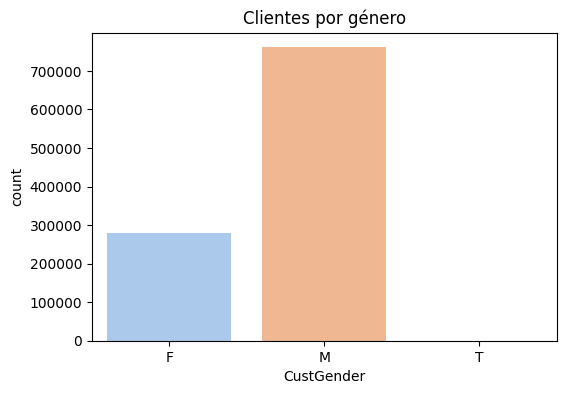

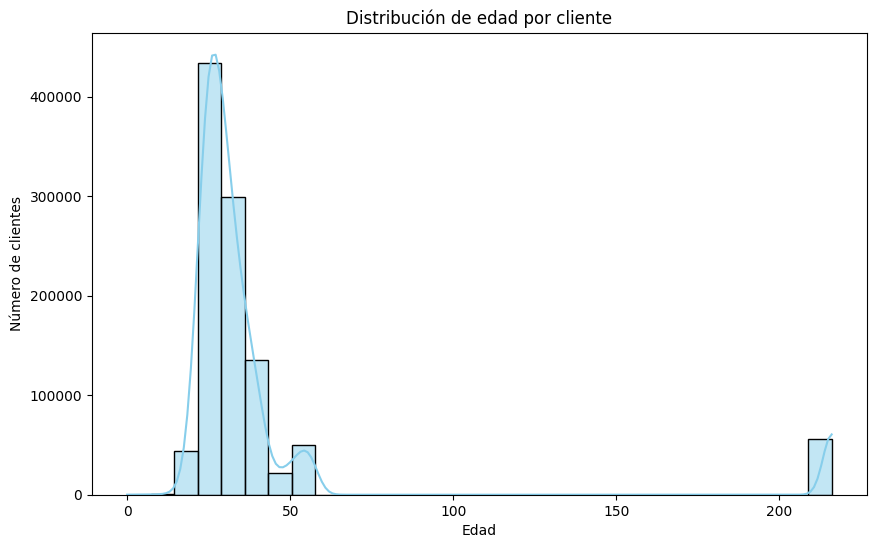

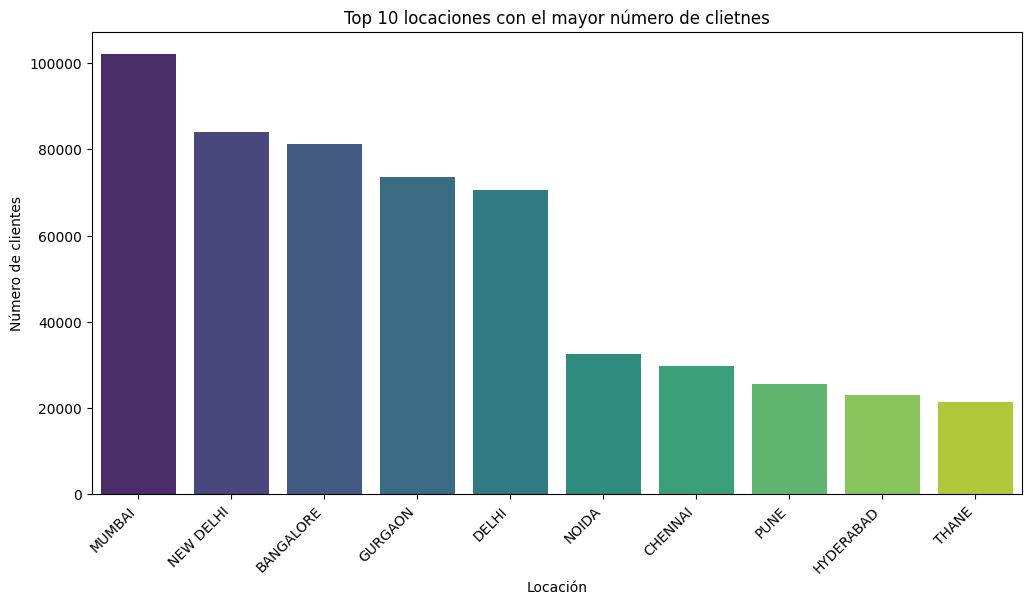

In [56]:
df1 = df.copy()
# Distribución de clientes por género
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Clientes por género')
plt.show()

# Edad de clientes
plt.figure(figsize=(10, 6))
sns.histplot(df1['CusAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edad por cliente')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.show()

# Locación del número de clientes 
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 locaciones con el mayor número de clietnes')
plt.xlabel('Locación')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

### Codificación y Escaler de datos

In [59]:
from sklearn.preprocessing import LabelEncoder

# Columnas no útiles para el análisis
df1.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

encoder = LabelEncoder()
df1['CustGender'] = encoder.fit_transform(df['CustGender'])
df1['CustLocation'] = encoder.fit_transform(df['CustLocation'])
df

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
0,0,3557,17819.05,2016-02-08,25.0,22
1,1,3618,2270.69,2016-02-08,27999.0,41
2,0,5219,17874.44,2016-02-08,459.0,20
3,0,5219,866503.21,2016-02-08,2060.0,57
4,0,5606,6714.43,2016-02-08,1762.5,28
...,...,...,...,...,...,...
1048562,1,5738,7635.19,2016-09-18,799.0,26
1048563,1,5580,27311.42,2016-09-18,460.0,24
1048564,1,3367,221757.06,2016-09-18,770.0,27
1048565,1,9059,10117.87,2016-09-18,1000.0,38


In [60]:
df1.drop('CustomerID', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CustGender               1041614 non-null  int64         
 1   CustLocation             1041614 non-null  int64         
 2   CustAccountBalance       1041614 non-null  float64       
 3   TransactionDate          1041614 non-null  datetime64[ns]
 4   TransactionAmount (INR)  1041614 non-null  float64       
 5   CusAge                   1041614 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 55.6 MB


In [61]:
scaler = StandardScaler()
# escalamiento de variables numericas
numerical = ['CustAccountBalance', 'TransactionAmount (INR)', 'CusAge']
df1[numerical] = scaler.fit_transform(df1[numerical])
df1.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
0,0,3557,-0.114766,2016-02-08,-0.234871,-0.439985
1,1,3618,-0.133128,2016-02-08,4.028509,0.005788
2,0,5219,-0.114701,2016-02-08,-0.168727,-0.486909
3,0,5219,0.887505,2016-02-08,0.075273,0.381177
4,0,5606,-0.127881,2016-02-08,0.029933,-0.299215


In [34]:
df['CustAccountBalance'].unique()

array([-0.11528203, -0.13365017, -0.11521659, ...,  0.07972467,
       -0.11856757, -0.13514781])

### **Task 2.1.1 - K-Means y Segmentación de Clientes de Banco**

### K-Means con librerías

In [64]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Variables de segmentación
X = df1[['CusAge', 'TransactionAmount (INR)']].values
Y = df1[['CustLocation', 'TransactionAmount (INR)']].values


#  KMeans clustering y método del codo
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Método del codo para el cluster de la edad de clientes')
perform_elbow_method(Y, k_range=(2, 20), title='Método del codo para el cluster de la locación de clientes ')

KeyError: "['CustomerAge'] not in index"